In [1]:
import sys
import os
import logging

import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from BDT import (
    read_data,
    read_features,
    prepare_test_data,
    prepare_test_data_matrix,
    prepare_data_matrix,
)

In [2]:
# load data and model
SPLIT_FRACTION = 0.5
data = read_data("./input/")
feature_names = read_features(data)
data_test = prepare_test_data(data, SPLIT_FRACTION)
test_data_matrix = prepare_test_data_matrix(data_test, feature_names)

X = data[feature_names]

booster = xgb.Booster()
booster.load_model("./output/booster.bin")
booster.feature_names = feature_names # save_model does not save feature names
booster.feature_types = ['float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']

In [3]:
print(booster.__dir__())

['handle', 'booster', 'feature_names', 'feature_types', '__module__', '__doc__', '__init__', '__del__', '__getstate__', '__setstate__', 'save_config', 'load_config', '__copy__', '__deepcopy__', 'copy', 'load_rabit_checkpoint', 'save_rabit_checkpoint', 'attr', 'attributes', 'set_attr', 'set_param', 'update', 'boost', 'eval_set', 'eval', 'predict', 'inplace_predict', 'save_model', 'save_raw', 'load_model', 'dump_model', 'get_dump', 'get_fscore', 'get_score', 'trees_to_dataframe', '_validate_features', 'get_split_value_histogram', '__dict__', '__weakref__', '__repr__', '__hash__', '__str__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__new__', '__reduce_ex__', '__reduce__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__']


In [4]:
# booster.get_split_value_histogram(feature_names[0])["SplitValue"].hist(bins=50)
print(booster.attributes())

{}


In [5]:
booster.trees_to_dataframe()

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover
0,0,0,0-0,lab0_ptasy_1.50,0.248850,0-1,0-2,0-1,788.899170,843.500000
1,0,1,0-1,lab0_IPCHI2_OWNPV,2.331810,0-3,0-4,0-3,168.067261,657.000000
2,0,2,0-2,lab2_PT,1016.813110,0-5,0-6,0-5,249.608841,186.500000
3,0,3,0-3,lab2_PT,1277.614750,0-7,0-8,0-7,105.323128,104.750000
4,0,4,0-4,lab0_RFD,2.706576,0-9,0-10,0-9,16.493042,552.250000
...,...,...,...,...,...,...,...,...,...,...
10453,299,6,299-6,lab0_ptasy_1.50,0.260305,299-7,299-8,299-7,0.105013,4.534352
10454,299,7,299-7,lab2_PT,2886.975590,299-9,299-10,299-9,0.071963,2.588704
10455,299,8,299-8,Leaf,NaN,NaN,NaN,NaN,0.012801,1.945649
10456,299,9,299-9,Leaf,NaN,NaN,NaN,NaN,-0.023589,1.280297


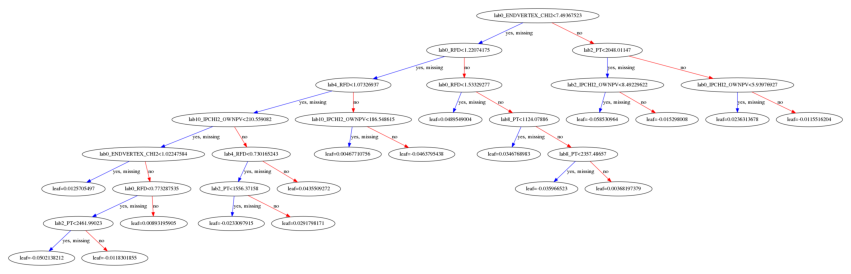

In [11]:
from xgboost import plot_tree
plot_tree(booster, fontsize=10, num_trees=100)
fig = plt.gcf()
fig.set_size_inches(15,10)
